In [2]:
import cv2
import os
from classes import WBsRGB as wb_srgb
from matplotlib import pyplot as plt

In [3]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
  (h, w) = image.shape[:2]

  if width is None and height is None:
    return image
  if width is None:
    r = height / float(h)
    dim = (int(w * r), height)
  else:
    r = width / float(w)
    dim = (width, int(h * r))

  return cv2.resize(image, dim, interpolation=inter)

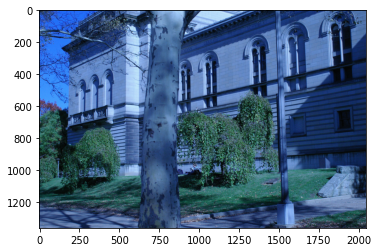

In [29]:
# input and options
in_img = '../example_images/Flcikr_Rhett_Sutphin_CC_BY_2.0.jpg'  # input image filename
img = cv2.imread(in_img)

# reverse Red and Blue value for reading image in Matplotlib
b,g,r = cv2.split(img)
fixed_img = cv2.merge((r,g,b))

plt.imshow(fixed_img)
plt.show()

In [24]:
def white_balancing(img, imshow=1, imwrite=1):
    out_dir = '.'  # output directory
    # use upgraded_model= 1 to load our new model that is upgraded with new
    # training examples.
    upgraded_model = 0
    # use gamut_mapping = 1 for scaling, 2 for clipping (our paper's results
    # reported using clipping). If the image is over-saturated, scaling is
    # recommended.
    gamut_mapping = 2
    imshow = 1  # show input/output image

    # processing
    # create an instance of the WB model
    wbModel = wb_srgb.WBsRGB(gamut_mapping=gamut_mapping,
                             upgraded=upgraded_model)
    os.makedirs(out_dir, exist_ok=True)
    # I = cv2.imread(in_img)  # read the image
    outImg = wbModel.correctImage(img)  # white balance it
    if imwrite == 1:
        cv2.imwrite(out_dir + '/' + 'result.jpg', outImg * 255)  # save it

    if imshow == 1:
        origin_img = ResizeWithAspectRatio(img, width=600)
        plt.imshow(origin_ima)
        plt.title('Original Image')
        plt.show()
        plt.imshow(ResizeWithAspectRatio(outImg, width=600))
        plt.title('Processed Image')
        plt.show()
    
    return outImg

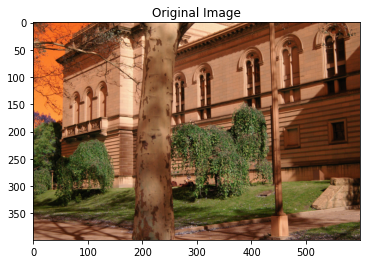

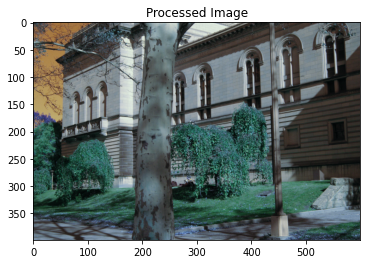

array([[[0.57528675, 0.5320941 , 0.50691694],
        [0.36255184, 0.24736778, 0.16202374],
        [0.41933775, 0.26850343, 0.1821732 ],
        ...,
        [0.4162163 , 0.44417006, 0.4824352 ],
        [0.4136841 , 0.44443682, 0.47423884],
        [0.41693497, 0.4484413 , 0.4791013 ]],

       [[0.5068245 , 0.4498432 , 0.41382405],
        [0.5031677 , 0.41902244, 0.37144893],
        [0.42509103, 0.26750386, 0.15758677],
        ...,
        [0.41045427, 0.4404326 , 0.46935782],
        [0.4139221 , 0.44485325, 0.46589592],
        [0.42376578, 0.45690593, 0.48045   ]],

       [[0.38171905, 0.2857899 , 0.24835013],
        [0.5135829 , 0.43532857, 0.40933138],
        [0.4988179 , 0.37091953, 0.26835567],
        ...,
        [0.40902135, 0.44858608, 0.462818  ],
        [0.41885787, 0.4606576 , 0.4773774 ],
        [0.43228045, 0.47675902, 0.49652284]],

       ...,

       [[0.47348753, 0.55687916, 0.6459549 ],
        [0.48124063, 0.56480324, 0.65441453],
        [0.48913383, 0

In [25]:
white_balancing(img)